# Aprendizaje Supervisado

## Algoritmos más comunes

1. K-vecinos (K-Nearest)
2. Redes Neuronales (Artificial neural networks)
3. Maquinas de vectores
4. Clasificador Bayesiano
5. Arbol de decisión
6. Regresión logísitica

## Clasificación vs regresión

| Clasificación | Regresión |
|--|--|
| Agrupar salida en una clase | Predecir el valor de salida en base a datos de entrenamiento |
| Si la varialbe de estudio es discreta o categórica entonces es un problema de clasificación | Si la vriable de estudio es numérica o tontinua entonces es un problema de regresión |

## Clasificación

Algoritmo: Naive Bayes es el máss popular:

Pasos:
1. **Entrenar** el programa usando un conjunto de entranimento con una categoría
2. **Testear** con un conjunto de datos de prueba

## Evaluación del modelo

**Accuracy rate**: es el procentaje que muestra del conjunto de test que son correctamente clasificadas.

**Método holdout**: El conjunto de test es independiente del de entraniento    

**K-fold cross validation**: Datos iniciales particionados en *k* subconjuntos mutuamente excluyentes de aproximadamente igual tamaño. Se hace **training** y **testing k** veces

**Stratisfied cross-validation**:

## Matriz de confusión

Determina los casos correctameinte clasificados y los errores de clasifiación

## Evaluación del Modelo

**Precición**, de la cantidad de veces que se predijo una clase, cuántas fueron correctas?

**Recall**: Se encontraron todos los ejemmplos que pertenecen a la clase?

## Evaluación y comparación de métodos de clasificación

**Exactitud de predicción** Habilidad del modelo de predecir correctamente la etiqueta de clase de nuevos ejemplos

**Velocidad** Tiempo para construir el modelo y tiempo para usar el modelo

**Robustez** Manejo de valores faltantes y ruido (predicciones correctas)

**Escalabilidad** Eficiencia en grandes bases de datos

**Facilidad de interpretación**: Nivel de entendimiento provisto por el modelo

**Fomra de las reglas** Tamaño del arbol de decisión y que tan compactas son las reglas de clasifcación

## Arbol de Decisión

Consta de:

1. **nodos internos** que denotan un test sobre un atributo
2. **ramas** que representan una salida del test. Todas las tuplas de una rama tienen el mismo valor para el atributo evaluado
3. **nodos hoja** que represntan las etiquetas de clase

## Construcción de un arbol

Alrgoritmo **Greedy** hace una elección óptima en cada cpaso. Seleccionar el merjo atributo para cada nodo en el árbol

**Divide y conquista recursivo top-down** De la raíz a las hojas, partir un nodo en varias ramas, par cada rama, correr recursivamente el algoritmo.



## Regresión

Y = a X + b + e

## Coeficiente de correlación

**r o R** es una medida de asociación entra las viraibles aleatorias X e Y cuyo valor varía entre *-1 y +1*

Si el valor esta entre **-0.5 u +0.5**, no conviene aplicar regresión

In [1]:
import numpy as np
import pandas as pd

In [4]:
# usa_ds = pd.read_csv('./Clase2/USArrests.csv')
# Montar volumen y cargar df
from google.colab import drive
drive.mount('/content/drive')

C_MAIN_PATH = '/content/drive/MyDrive/UP/00_Diplomatura_IA_2024/'
V_NOMBRE_ARCHIVO_MAESTRO = 'Semana 05 - Módulo 02 - Clase 09 - USArrests'
V_PATH_Y_NOMRE_ARCHIVO = C_MAIN_PATH + V_NOMBRE_ARCHIVO_MAESTRO + '.csv'

usa_ds = pd.DataFrame(pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ","))

usa_ds.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Calculo de los coeficientes de correlación con Pandas

Si el valor es superior a 0.5 es relacion buena

Si el valor es inferior a -0.5 es realación buena

In [25]:
#usa_ds.corr()

usa_ds_corr = usa_ds[['Murder','Assault','UrbanPop','Rape']]
usa_ds_corr.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


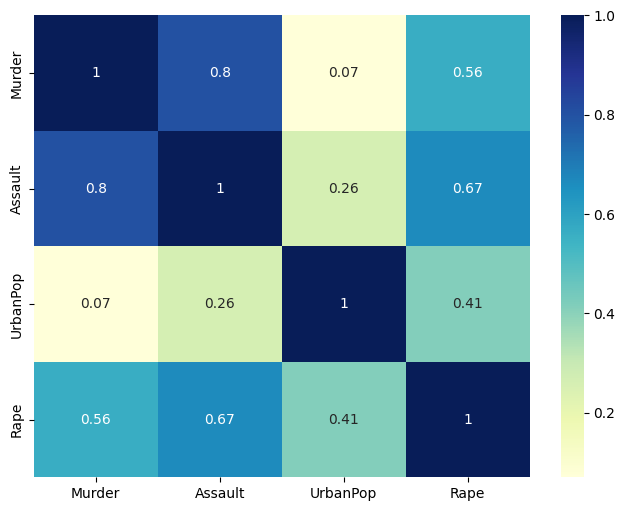

In [31]:
# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Revisemos los coeficientes de correlación para ver qué variables están altamente correlacionadas
plt.figure(figsize = (8, 6))
sns.heatmap(usa_ds_corr.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Regresión Lineal

Correlación positiva entre Murder y Assault, modelemos los asesinatos en función de los asaltos

$Murder(Assault) = \beta_{0} + \beta_{1} * Assault $

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Divido el dataset en datos de entrenamiento y de prueba

In [33]:
X = usa_ds.Assault
y = usa_ds.Murder

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    random_state=0)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

X_r = usa_ds.Assault.values.reshape(-1, 1)
y_r = usa_ds.Murder.values.reshape(-1, 1)

X_train[:5], y_train[:5]

(array([[120],
        [ 83],
        [238],
        [ 56],
        [156]]),
 array([[7.3],
        [2.1],
        [5.9],
        [2.2],
        [8.5]]))

## Entrenamiento del modelo sin separar conjunto de entrenamiento y de prueba

In [34]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

## Reviso los coeficientes calculados

Verifico el intercepto ( ordenada al origen ) y el coeficiente por la variable analizada (Assault)

In [35]:
lr.coef_, lr.intercept_

interceptor = lr.intercept_[0]
assault_coef = lr.coef_[0][0]

interceptor, assault_coef

(0.6106526592811061, 0.04386135724705687)

In [36]:
usa_ds["MurderPredict"] = interceptor + assault_coef * usa_ds.Assault

In [37]:
usa_ds.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,MurderPredict
0,Alabama,13.2,236,58,21.2,10.961933
1,Alaska,10.0,263,48,44.5,12.146190
2,Arizona,8.1,294,80,31.0,13.505892
3,Arkansas,8.8,190,50,19.5,8.944311
4,California,9.0,276,91,40.6,12.716387


## Coeficiente de determinación $_R{2}$

Determina la exactitud del modelo

In [38]:
from sklearn.metrics import r2_score

In [39]:
X_test_r = X_test.values.reshape(-1,1)
y_pred = lr.predict(X_test_r)

r2 = r2_score(y_pred, y_test)

r2

0.4216883240461572

## Regresión Lineal Multivariada

Vamos a calcular las violaciones en función de los asesinatos y asaltos

$Rape(Assault, Murder) = \beta_{0} + Assault * \beta_{1} + Murder * \beta_{2} $

In [40]:
rape_X_train, rape_X_test, rape_y_train, rape_y_test = train_test_split(usa_ds[["Assault", "Murder"]], usa_ds.Rape, test_size=.3, \
                                                    random_state=0)

X_assault_murder = usa_ds[["Assault", "Murder"]]
y_rape = usa_ds.Rape

X_assault_murder[:5], y_rape[:5], X_train, y_train

(   Assault  Murder
 0      236    13.2
 1      263    10.0
 2      294     8.1
 3      190     8.8
 4      276     9.0,
 0    21.2
 1    44.5
 2    31.0
 3    19.5
 4    40.6
 Name: Rape, dtype: float64,
 array([[120],
        [ 83],
        [238],
        [ 56],
        [156],
        [ 53],
        [159],
        [115],
        [285],
        [337],
        [109],
        [201],
        [149],
        [120],
        [335],
        [113],
        [109],
        [204],
        [249],
        [ 86],
        [161],
        [263],
        [249],
        [106],
        [178],
        [110],
        [259],
        [159],
        [255],
        [300],
        [211],
        [279],
        [145],
        [190],
        [236],
        [ 81],
        [ 48]]),
 array([[ 7.3],
        [ 2.1],
        [ 5.9],
        [ 2.2],
        [ 8.5],
        [ 2.6],
        [ 7.4],
        [ 6. ],
        [11.4],
        [13. ],
        [ 9.7],
        [12.7],
        [ 4.4],
        [ 3.2],
        [15.4]

In [41]:
lr_rape = LinearRegression()

lr_rape.fit(rape_X_train, rape_y_train)

lr_rape_intercept = lr_rape.intercept_
lr_rape_assault_coef = lr_rape.coef_[0]
lr_rape_murder_coef = lr_rape.coef_[1]

lr_rape_intercept, lr_rape_assault_coef, lr_rape_murder_coef

(10.47301383220393, 0.07209601485782462, -0.23492552508661713)

In [42]:
usa_ds['RapePredict'] = lr_rape_intercept \
                      + lr_rape_assault_coef * usa_ds.Assault \
                      + lr_rape_murder_coef * usa_ds.Murder

usa_ds['RapePredictCompute'] = lr_rape.predict(usa_ds[['Assault', 'Murder']])

usa_ds.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,MurderPredict,RapePredict,RapePredictCompute
0,Alabama,13.2,236,58,21.2,10.961933,24.386656,24.386656
1,Alaska,10.0,263,48,44.5,12.146190,27.085010,27.085010
2,Arizona,8.1,294,80,31.0,13.505892,29.766345,29.766345
3,Arkansas,8.8,190,50,19.5,8.944311,22.103912,22.103912
4,California,9.0,276,91,40.6,12.716387,28.257184,28.257184


In [47]:
from IPython.display import Markdown

rape_y_pred = lr_rape.predict(rape_X_test)

r2_rape = r2_score(rape_y_test, rape_y_pred )

display(Markdown("""$R^{{2}}=$ **{:.4}**""".format(r2_rape)) )


$R^{2}=$ **0.4755**

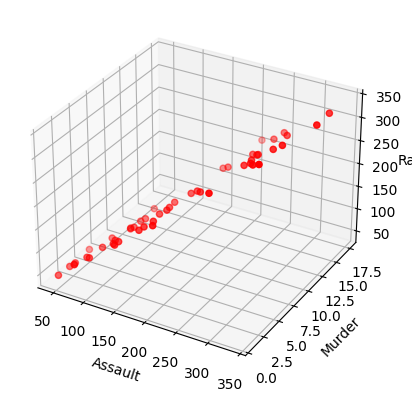

In [48]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = usa_ds.Assault
y = usa_ds.Murder
z = usa_ds.Assault

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Assault')
ax.set_ylabel('Murder')
ax.set_zlabel('Rape')
#plt.scatter(x=usa_ds.Assault, y=usa_ds.Murder, z=usa_ds.Rape, c='r', \
#           projection='3d')

plt.show()
